### Alternative solution to Part.III/Lab.2
by Doug Rennehan (TA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A Transformation Approach to the Problem

We can construct our 2D square frame by starting with a standard ruler. This is equivalent to the **pencil** from class, where we constructed a standard ruler that went from -0.5 to 0.5. I want you to consider a standard ruler from 0 to 1 to which we will apply transformations to obtain the square (and any other) shape.

First, we create a linear space from 0 to 1 in N steps.

In [1]:
N = 10
std_ruler = np.linspace(0, 1, N)

std_ruler

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

You can think of the vector connecting the first and last points of **std_ruler** as a unit vector that points in *some direction unknown to us at this point*. It could be $\hat{x}$ or $\hat{y}$ here, and we need another coordinate in order to tell which direction the vector is pointing.

If we want **std_ruler** to be a unit vector in the $\hat{x}$ direction, our *second coordinate* will be all $0$. Likewise, if we want **std_ruler** to point in the $\hat{y}$ direction we construct a *first coordinate* that will be all $0$.

I'm going to choose this to be the $\hat{x}$ unit vector. Therefore I need a new vector **y_coords** that is all zeros and the same length as **std_ruler**.

**Important Note:** each point in **std_ruler** represents a vector. Think about taking 0, the first element of std_ruler and creating a vector from each other point.

In [3]:
y_coords = np.zeros(len(std_ruler))

y_coords

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Great, we have our $x$ and $y$ coordinates of the unit vector. There is a problem however: these aren't in the familiar form of ordered pairs $(x,y)$, they are two separate vectors!

We need to combine **std_ruler** and **y_coords** into ordered pairs. My favorite way to do this is using numpy <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html" target="_blank">vstack</a>. This stacks two vectors **v**ertically into a single column. In the case of 1D vectors, both vectors need to be the same length $N$. 

For our case of stacking two vectors, it will produce a numpy array with $2$ rows and $N$ columns. However, we want $N$ rows and $2$ columns for row-major ordering. This can be done with a transpose using numpy <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html" target="_blank">transpose</a>.

In [4]:
real_vectors = np.vstack((std_ruler, y_coords))

real_vectors

array([[ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
         0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [5]:
real_vectors = np.transpose(real_vectors)

real_vectors

array([[ 0.        ,  0.        ],
       [ 0.11111111,  0.        ],
       [ 0.22222222,  0.        ],
       [ 0.33333333,  0.        ],
       [ 0.44444444,  0.        ],
       [ 0.55555556,  0.        ],
       [ 0.66666667,  0.        ],
       [ 0.77777778,  0.        ],
       [ 0.88888889,  0.        ],
       [ 1.        ,  0.        ]])

## What was the point of that?

We now have a set of $N$ vectors that we can apply transformations to, let's call the set of these vectors $\vec{v}$.

Now we can apply 2 constant vector transformations to $\vec{v}$ to obtain the set of points $x \in [-0.5, 0.5]$, and $y = -0.5$.  This is one of the edges of our square.

The **first** transformation is $\vec{v}' = \vec{v} + \vec{a}$, where $\vec{a} = (-0.5, 0)$.

The **second** transformation is $\vec{v}'' = \vec{v}' + \vec{b}$, where $\vec{b} = (0, -0.5)$.

Ordering does not matter here, so we can apply both at once using,

$\vec{v}' = \vec{v} + \vec{a} + \vec{b} = \vec{v} + \vec{c}$,

where $\vec{c} = \vec{a} + \vec{b} = (-0.5, -0.5)$.

In [6]:
c = np.array([-0.5, -0.5])

bottom_edge = real_vectors + c

bottom_edge

array([[-0.5       , -0.5       ],
       [-0.38888889, -0.5       ],
       [-0.27777778, -0.5       ],
       [-0.16666667, -0.5       ],
       [-0.05555556, -0.5       ],
       [ 0.05555556, -0.5       ],
       [ 0.16666667, -0.5       ],
       [ 0.27777778, -0.5       ],
       [ 0.38888889, -0.5       ],
       [ 0.5       , -0.5       ]])

I hope you now see how we can construct the 3 other edges. Let's move clockwise around the edges and create **left_edge**, **top_edge**, and **right_edge** using our standard ruler.

How can we construct **left_edge** from **real_vectors**? First we need to rotate 90 degrees ($\frac{\pi}{2}$ radians) counter clock-wise, and then shift down by the transformation $\vec{a} = (-0.5, 0)$.

Think about that transformation for a second.

We also need a way to rotate vectors. Let's write a function that rotates a vector by an angle theta! We need a **rotation_matrix** and we need to use numpy <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html" target="_blank">dot</a> to do the matrix multiplication.

Because our vector is (N,2), we need to transpose it before rotating due to the requirements of **dot**. The answer we get from the dot product also needs to be transposed back into the form (N,2) that we want.

**Note**: You can get creative and create them from bottom_edge, it is the same process except you need to be careful of where the zero point is.

In [7]:
def rotate(vector, theta):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta), np.cos(theta)]])
    
    return np.dot(rotation_matrix, vector.T).T

First, we print out **real_vectors** and then apply a couple of transformations to see it in action.

**Note**: The angles must be in radians.

In [8]:
real_vectors

array([[ 0.        ,  0.        ],
       [ 0.11111111,  0.        ],
       [ 0.22222222,  0.        ],
       [ 0.33333333,  0.        ],
       [ 0.44444444,  0.        ],
       [ 0.55555556,  0.        ],
       [ 0.66666667,  0.        ],
       [ 0.77777778,  0.        ],
       [ 0.88888889,  0.        ],
       [ 1.        ,  0.        ]])

In [9]:
rotate(real_vectors, np.pi / 2) # 90 degrees

array([[  0.00000000e+00,   0.00000000e+00],
       [  6.80359333e-18,   1.11111111e-01],
       [  1.36071867e-17,   2.22222222e-01],
       [  2.04107800e-17,   3.33333333e-01],
       [  2.72143733e-17,   4.44444444e-01],
       [  3.40179666e-17,   5.55555556e-01],
       [  4.08215600e-17,   6.66666667e-01],
       [  4.76251533e-17,   7.77777778e-01],
       [  5.44287466e-17,   8.88888889e-01],
       [  6.12323400e-17,   1.00000000e+00]])

In [10]:
rotate(real_vectors, np.pi) # 180 degrees

array([[  0.00000000e+00,   0.00000000e+00],
       [ -1.11111111e-01,   1.36071867e-17],
       [ -2.22222222e-01,   2.72143733e-17],
       [ -3.33333333e-01,   4.08215600e-17],
       [ -4.44444444e-01,   5.44287466e-17],
       [ -5.55555556e-01,   6.80359333e-17],
       [ -6.66666667e-01,   8.16431199e-17],
       [ -7.77777778e-01,   9.52503066e-17],
       [ -8.88888889e-01,   1.08857493e-16],
       [ -1.00000000e+00,   1.22464680e-16]])

In [11]:
rotate(real_vectors, 2 * np.pi) # 360 degrees

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.11111111e-01,  -2.72143733e-17],
       [  2.22222222e-01,  -5.44287466e-17],
       [  3.33333333e-01,  -8.16431199e-17],
       [  4.44444444e-01,  -1.08857493e-16],
       [  5.55555556e-01,  -1.36071867e-16],
       [  6.66666667e-01,  -1.63286240e-16],
       [  7.77777778e-01,  -1.90500613e-16],
       [  8.88888889e-01,  -2.17714987e-16],
       [  1.00000000e+00,  -2.44929360e-16]])

What are those extremely small numbers? Those are rounding errors. They are close enough to $0$ that it won't matter.

Let's apply the rotation, followed by a translation to get **left_edge**.

**Important Note**: The ordering does matter here.

$\vec{v}' = R\vec{v} + \vec{a} \neq R(\vec{v} + \vec{a})$

In [12]:
a_left_edge = np.array([-0.5, -0.5])

left_edge = rotate(real_vectors, np.pi / 2) + a_left_edge

left_edge

array([[-0.5       , -0.5       ],
       [-0.5       , -0.38888889],
       [-0.5       , -0.27777778],
       [-0.5       , -0.16666667],
       [-0.5       , -0.05555556],
       [-0.5       ,  0.05555556],
       [-0.5       ,  0.16666667],
       [-0.5       ,  0.27777778],
       [-0.5       ,  0.38888889],
       [-0.5       ,  0.5       ]])

The other edges should be just as easy now! Think about the transformations needed for each.

In [13]:
a_top_edge = np.array([-0.5, 0.5])

top_edge = real_vectors + a_top_edge

top_edge

array([[-0.5       ,  0.5       ],
       [-0.38888889,  0.5       ],
       [-0.27777778,  0.5       ],
       [-0.16666667,  0.5       ],
       [-0.05555556,  0.5       ],
       [ 0.05555556,  0.5       ],
       [ 0.16666667,  0.5       ],
       [ 0.27777778,  0.5       ],
       [ 0.38888889,  0.5       ],
       [ 0.5       ,  0.5       ]])

In [14]:
a_right_edge = np.array([0.5, -0.5])

right_edge = rotate(real_vectors, np.pi / 2) + a_right_edge

right_edge

array([[ 0.5       , -0.5       ],
       [ 0.5       , -0.38888889],
       [ 0.5       , -0.27777778],
       [ 0.5       , -0.16666667],
       [ 0.5       , -0.05555556],
       [ 0.5       ,  0.05555556],
       [ 0.5       ,  0.16666667],
       [ 0.5       ,  0.27777778],
       [ 0.5       ,  0.38888889],
       [ 0.5       ,  0.5       ]])

### Putting it all together

Remember that **vstack** function? Well all we have to do is stack our 4 sets of ordered pairs together to get all the points for our square!

In [15]:
square = np.vstack((bottom_edge, left_edge, top_edge, right_edge))

square

array([[-0.5       , -0.5       ],
       [-0.38888889, -0.5       ],
       [-0.27777778, -0.5       ],
       [-0.16666667, -0.5       ],
       [-0.05555556, -0.5       ],
       [ 0.05555556, -0.5       ],
       [ 0.16666667, -0.5       ],
       [ 0.27777778, -0.5       ],
       [ 0.38888889, -0.5       ],
       [ 0.5       , -0.5       ],
       [-0.5       , -0.5       ],
       [-0.5       , -0.38888889],
       [-0.5       , -0.27777778],
       [-0.5       , -0.16666667],
       [-0.5       , -0.05555556],
       [-0.5       ,  0.05555556],
       [-0.5       ,  0.16666667],
       [-0.5       ,  0.27777778],
       [-0.5       ,  0.38888889],
       [-0.5       ,  0.5       ],
       [-0.5       ,  0.5       ],
       [-0.38888889,  0.5       ],
       [-0.27777778,  0.5       ],
       [-0.16666667,  0.5       ],
       [-0.05555556,  0.5       ],
       [ 0.05555556,  0.5       ],
       [ 0.16666667,  0.5       ],
       [ 0.27777778,  0.5       ],
       [ 0.38888889,

Let's make a quick plotting function so we can visualize the square and its transformations. We want a scatter plot to see how the points transform, and we can use matplotlib <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">scatter</a> to do this.

It requires $(x,y)$ pairs, and therefore we need to take slices of whatever we want to plot.

For example, **square** contains $N$ rows and 2 columns. To get all of the $x$ values, I use the following.

In [16]:
square[:, 0]

array([-0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
        0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
        0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ])

The colon **:** means **every index**. The $0$ refers to the **first column**.

In [17]:
def plot_pairs(pairs):
    plt.figure(figsize = (8, 8))
    plt.scatter(pairs[:, 0], pairs[:, 1])
    plt.show()
    plt.close()

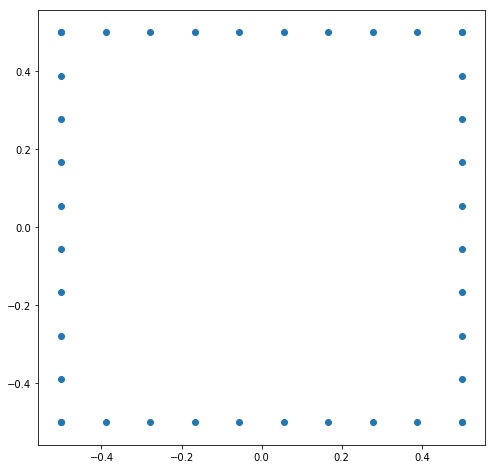

In [18]:
plot_pairs(square)

## Applying Transformations to the square and examples

We already have a **rotate** function, but what about other operations? Let's define shear and dilate/contract functions.

In [31]:
def shear(vector, m, axis = 'x'):
    if axis == 'x':
        shear_matrix = np.array([[1, m],
                                 [0, 1]])
    else:
        shear_matrix = np.array([[1, 0],
                                 [m, 1]])
        
    return np.dot(shear_matrix, vector.T).T

In [32]:
sheared_square = shear(square, 2, axis = 'x')

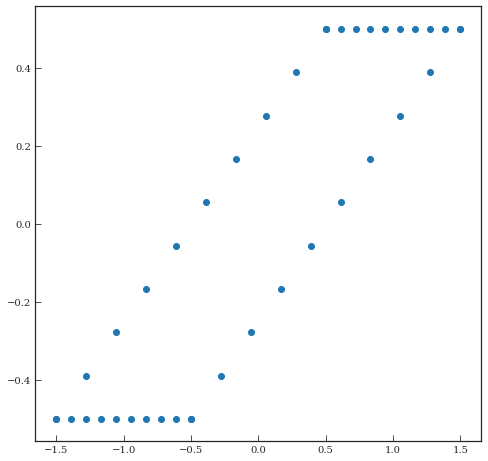

In [33]:
plot_pairs(sheared_square)

In [34]:
def dilate(vector, m):
    dilation_matrix = np.array([[m, 0],
                               [0, m]])
    
    return np.dot(dilation_matrix, vector.T).T

In [35]:
expand_square = dilate(square, 2)
contract_square = dilate(square, 1 / 2)

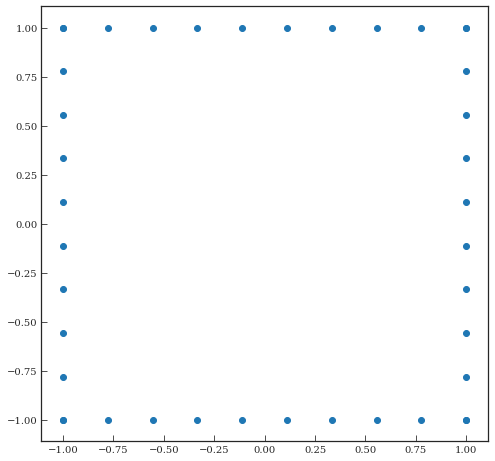

In [36]:
plot_pairs(expand_square)

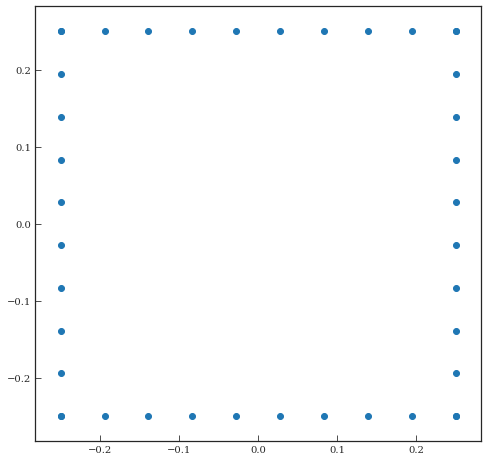

In [37]:
plot_pairs(contract_square)

Let's plot all of them together in different colors.

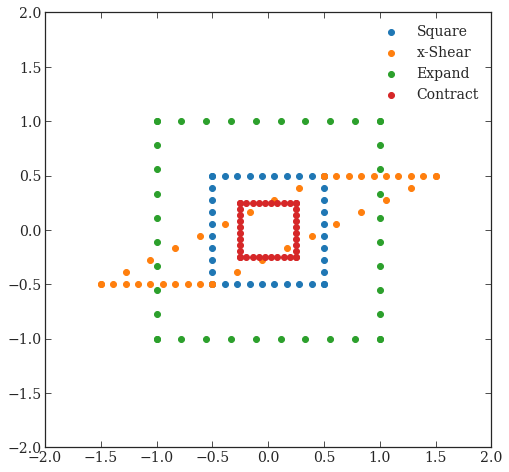

In [38]:
import matplotlib
import seaborn as sb
matplotlib.style.use('seaborn-ticks')
plot_style = {'xtick.direction': 'in',
             'ytick.direction': 'in',
             'font.family': ['DejaVu Serif'],
             'font.serif': ['Times New Roman']}

sb.set_style(plot_style)

plt.figure(figsize = (8, 8))
plt.ylim([-2, 2])
plt.xlim([-2, 2])
plt.scatter(square[:, 0], square[:, 1], label = 'Square')
plt.scatter(sheared_square[:, 0], sheared_square[:, 1], label = 'x-Shear')
plt.scatter(expand_square[:, 0], expand_square[:, 1], label = 'Expand')
plt.scatter(contract_square[:, 0], contract_square[:, 1], label = 'Contract')
plt.tick_params(top = True, right = True)
plt.tick_params(labelsize = 14)
plt.legend(fontsize = 14)
plt.show()
plt.close()

## Triangles?

This method is general enough that we could also construct triangles. But we will run into a problem. Do you know how to solve it?

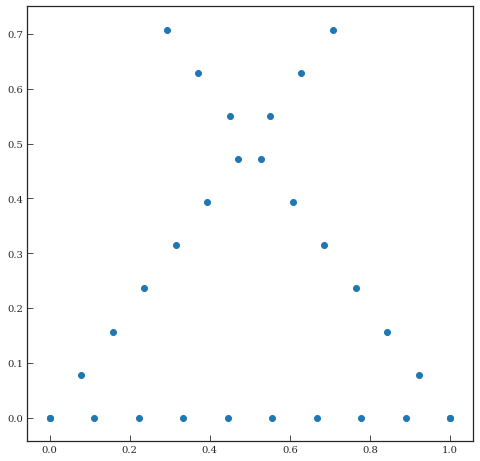

In [42]:
N = 10
triangle_ruler = np.linspace(0, 1, N)
triangle_ruler_y = np.zeros(N)

real_triangle_ruler = np.vstack((triangle_ruler, triangle_ruler_y)).T

triangle_bottom_edge = real_triangle_ruler
triangle_left_edge = rotate(real_triangle_ruler, np.pi / 4)
triangle_right_edge = rotate(real_triangle_ruler, 3 * np.pi / 4) + np.array([1.0, 0])

triangle = np.vstack((triangle_bottom_edge, triangle_left_edge, triangle_right_edge))

plot_pairs(triangle)